In [7]:
import torch
from matplotlib import pyplot as plt

In [8]:
res = torch.jit.load("pff_result.pt")
I_AC = dict(res.input.named_buffers())
O_AC = dict(res.output.named_buffers())

In [9]:
nstep = 1000
strain = [I_AC["{}.forces/E".format(i)][0].item() for i in range(nstep)]
stress_ac = [O_AC["{}.state/S".format(i)][0].item() for i in range(nstep)]
phase_ac = [O_AC["{}.state/d".format(i)].item() for i in range(nstep)]

In [10]:
res_fb = torch.jit.load("fb_pff_result.pt")
I_FB = dict(res_fb.input.named_buffers())
O_FB = dict(res_fb.output.named_buffers())

In [11]:
strain = [I_FB["{}.forces/E".format(i)][0].item() for i in range(nstep)]
stress_fb = [O_FB["{}.state/S".format(i)][0].item() for i in range(nstep)]
phase_fb = [O_FB["{}.state/d".format(i)].item() for i in range(nstep)]

## Phase Evolution

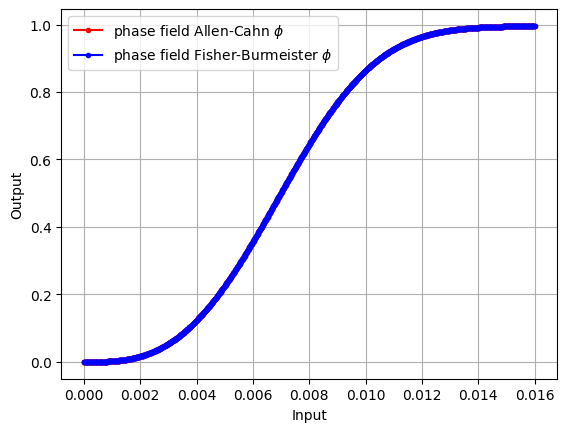

In [13]:
plt.plot(strain, phase_ac, "r.-", label="phase field Allen-Cahn $\phi$")
plt.plot(strain, phase_fb, "b.-", label="phase field Fisher-Burmeister $\phi$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()

## Sress Response

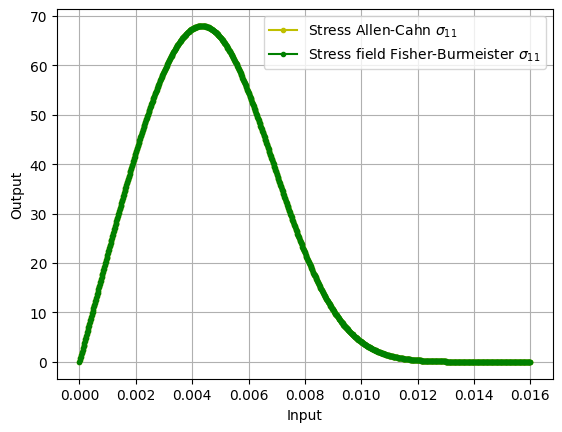

In [14]:
plt.plot(strain, stress_ac, "y.-", label="Stress Allen-Cahn $\sigma_{11}$")
plt.plot(strain, stress_fb, "g.-", label="Stress field Fisher-Burmeister $\sigma_{11}$")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.legend()
plt.show()